In [14]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [15]:
to_rename = {
    'unfinished' : 'finished'
}

data = data.rename(columns = to_rename)
data.head()


,finished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [19]:
make_finished = {
    0 : 1,
    1 : 0
}
data['finished'] = data.finished.map(make_finished)
data.head()

,finished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [20]:
data.tail()

,finished,expected_hours,price
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324
2156,1,37,377


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

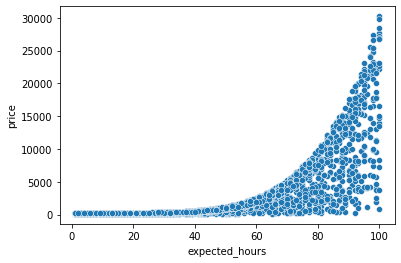

In [24]:
import seaborn as sns

sns.scatterplot(x="expected_hours", y="price", data=data)

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

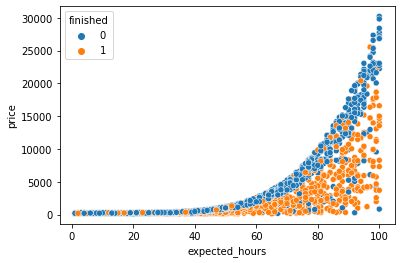

In [25]:
sns.scatterplot(x="expected_hours", y="price", hue="finished", data=data)

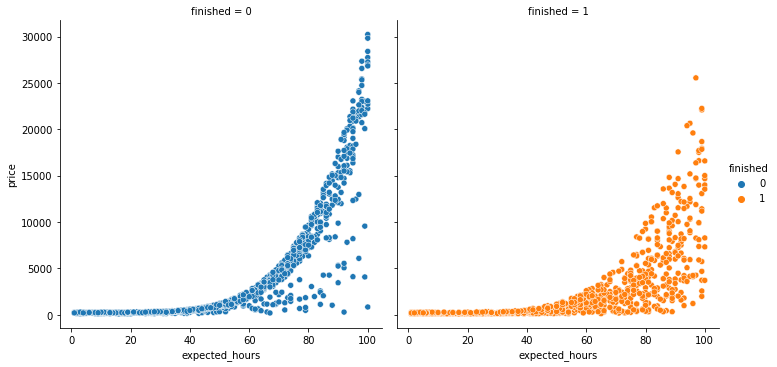

In [26]:
sns.relplot(x="expected_hours", y="price", hue="finished", col="finished", data=data)

In [28]:
describers = data[['expected_hours', 'price']]
results = data['finished']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 12

train_describers, test_describers, train_results, test_results = train_test_split(describers, results,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = results)

print("We ll train with %d elements e test it with %d elements" % (len(train_describers), len(test_describers)))

model = LinearSVC()
model.fit(train_describers, train_results)
predictions = model.predict(test_describers)

accuracy = accuracy_score(test_results, predictions) * 100
print("The accuracy %.2f%%" % accuracy)

We ll train with 1617 elements e test it with 540 elements
The accuracy 56.48%
/home/delimanicolas/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [30]:
import numpy as np
base_predictions = np.ones(540)
base_predictions_accuracy = accuracy_score(test_results, base_predictions) * 100
print("Baseline alhorithm accuracy was %.2f%%" % accuracy)

Baseline alhorithm accuracy was 56.48%
